# Лабораторная работа №2
## Выполнил студент группы 17-АС Смирнова 
## Вариант 19 
    *Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
    *Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
    *Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
    +Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
    +Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
    Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
    Заполните пропущенные значения в данных;
    Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
    Сравните кривые для классификаторов, указанных в задании, сделайте выводы.
    


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import interp
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (auc, roc_curve, 
                             precision_recall_curve, 
                             average_precision_score)

from sklearn import datasets
from sklearn.linear_model import perceptron
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from matplotlib.pylab import rc, plot

df = pd.read_csv(r'glass.csv')

D:\WinPython-64bit-3.5.4.0Qt5\python-3.5.4.amd64\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\WinPython-64bit-3.5.4.0Qt5\python-3.5.4.amd64\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
#### Идентификационный номер: от 1 до 214 (удален из CSV-файла)
#### РИ: индекс преломления
#### Na: натрий (единица измерения: процент веса в соответствующей окиси, как и атрибуты 4-10)
#### Mg: Магний
#### Al: Алюминий
#### Si: Кремний
#### K: Калий
#### Ca: Кальция
#### Ба: Барий
#### Fe: Железо

In [2]:
df.shape

(214, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


## 2.Удалите дубликаты строк в наборе данных

In [4]:
df = df.drop_duplicates()
df = df.dropna()
df.shape

(213, 10)

In [5]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## 3. Оцените сбалансированность данных по классам (постройте гистограмму)

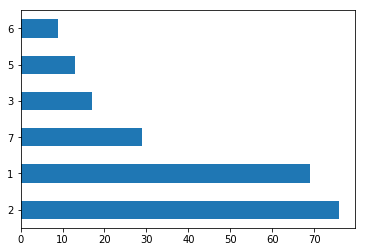

In [6]:
%matplotlib inline
df['Type'].value_counts().plot.barh()
plt.show()

## 4) Выполните масштабирование количественных признаков

In [7]:
numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
categorial:  []


In [8]:
df['Type'] = df['Type'].apply(lambda x: str(x))

#заново выделим категориальные и числовые
numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
categorial:  ['Type']


In [9]:
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0,1
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0,1
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0,1
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0,1
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0,1


## 5) Выполните замену категориальных признаков

In [10]:
for i in categorial_columns:
    print(i,': ', df[i].unique())

Type :  ['1' '2' '3' '5' '6' '7']


In [11]:
binary_columns = [i for i in categorial_columns if len(df[i].unique()) == 2]
nonbinary_columns = [i for i in categorial_columns if len(df[i].unique()) > 2]

# для бинарных заменим значения на 1 и 0
for col in binary_columns:
    for i, unic_item in enumerate(df[col].unique()):
        df[col] = df[col].replace(to_replace=[unic_item], value=[i])
        
# для не бинарых применим dummy-кодирование
df_nonbinary = pd.get_dummies(df[nonbinary_columns])
df.drop(nonbinary_columns, axis=1, inplace=True)
df = pd.concat([df_nonbinary, df] , axis=1)

print(df.shape)
df.head()

(213, 15)


,Type_1,Type_2,Type_3,Type_5,Type_6,Type_7,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,0,0,0,0,0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0
1,1,0,0,0,0,0,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0
2,1,0,0,0,0,0,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0
3,1,0,0,0,0,0,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0
4,1,0,0,0,0,0,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0


## 6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

In [12]:
df.head()

,Type_1,Type_2,Type_3,Type_5,Type_6,Type_7,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,0,0,0,0,0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0
1,1,0,0,0,0,0,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0
2,1,0,0,0,0,0,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0
3,1,0,0,0,0,0,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0
4,1,0,0,0,0,0,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0


          Type_1    Type_2    Type_3    Type_5    Type_6    Type_7        RI  \
Type_1  1.000000 -0.515573 -0.203864 -0.176482 -0.145395 -0.274811  0.073456   
Type_2 -0.515573  1.000000 -0.219353 -0.189890 -0.156442 -0.295690  0.066659   
Type_3 -0.203864 -0.219353  1.000000 -0.075085 -0.061859 -0.116919 -0.037396   
Type_5 -0.176482 -0.189890 -0.075085  1.000000 -0.053550 -0.101215  0.048865   
Type_6 -0.145395 -0.156442 -0.061859 -0.053550  1.000000 -0.083387 -0.061932   
Type_7 -0.274811 -0.295690 -0.116919 -0.101215 -0.083387  1.000000 -0.161582   
RI      0.073456  0.066659 -0.037396  0.048865 -0.061932 -0.161582  1.000000   
Na     -0.149383 -0.267279  0.011919 -0.180366  0.320340  0.505778 -0.198802   
Mg      0.417816  0.166981  0.176735 -0.337272 -0.200322 -0.590119 -0.127526   
Al     -0.385551 -0.062212 -0.147806  0.301124 -0.035159  0.540242 -0.400973   
Si     -0.021175 -0.055022 -0.095489 -0.095392  0.150041  0.159787 -0.539000   
K      -0.049453  0.025350 -0.041761  0.

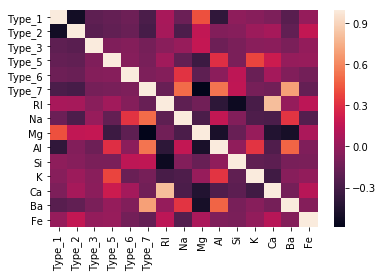

In [13]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix);
print(corr_matrix)

## 7

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 15 columns):
Type_1    213 non-null uint8
Type_2    213 non-null uint8
Type_3    213 non-null uint8
Type_5    213 non-null uint8
Type_6    213 non-null uint8
Type_7    213 non-null uint8
RI        213 non-null float64
Na        213 non-null float64
Mg        213 non-null float64
Al        213 non-null float64
Si        213 non-null float64
K         213 non-null float64
Ca        213 non-null float64
Ba        213 non-null float64
Fe        213 non-null float64
dtypes: float64(9), uint8(6)
memory usage: 17.9 KB


## 8. Решите поставленную задачу классификации в соответствии с заданием

In [55]:
# Дерево
dtc = DecisionTreeClassifier()
X, y = df.drop('Type_6', axis=1), df['Type_6']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
params = {'max_depth': list(range(1,12)), 'max_features': list(range(1,12))}

dtc_grid = GridSearchCV(dtc, params)
dtc_grid.fit (X_train, y_train)

best_features = dtc_grid.best_estimator_.max_features
best_depth = dtc_grid.best_estimator_.max_depth
best_score = dtc_grid.best_score_
print('best train score:', best_score, 
      '\t at features number:', best_features,
      '\t at depth:', best_depth)

dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
dtc.fit(X_train, y_train)
best_score  = np.mean(y_test == dtc.predict(X_test))
print('test score: ', best_score)

best train score: 0.9865771812080537 	 at features number: 3 	 at depth: 3
test score:  0.96875


In [56]:
knn = neighbors.KNeighborsClassifier()
params = {'n_neighbors': list(range(1, 30))}
knn_grid = GridSearchCV(knn, params)
knn_grid.fit(X_train, y_train)
best_num = knn_grid.best_estimator_.n_neighbors
best_score = knn_grid.best_score_

print('best train score: ', best_score,
      '\t at neighbors number: ', best_num)

best train score:  1.0 	 at neighbors number:  1


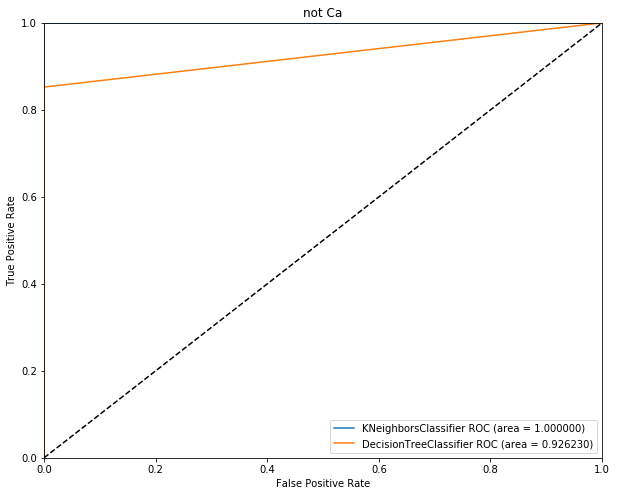

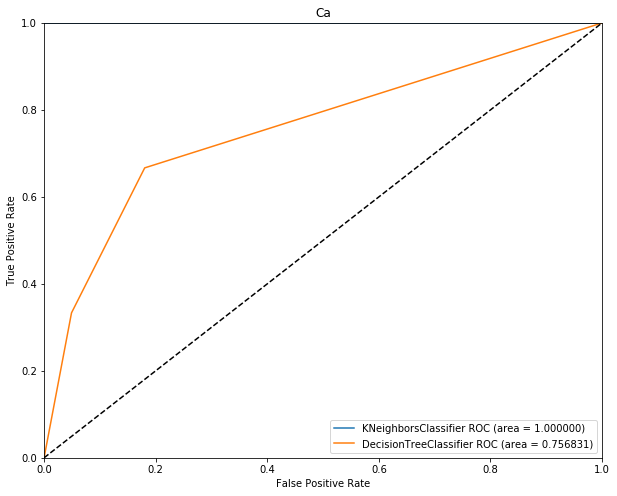

In [57]:
plt.figure(figsize=(10,8))
# K соседей
knn = KNeighborsClassifier ( n_neighbors =best_num)
probas_knn0 = knn.fit(X_train, y_train).predict_proba (X_test)
tpr, fpr, thresholds = roc_curve(y_test, probas_knn0[:,0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('KNeighborsClassifier', roc_auc)) 

# решающее дерево
dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
probas_dtc0 = dtc.fit(X_train, y_train).predict_proba (X_test)
tpr, fpr, thresholds = roc_curve(y_test, probas_dtc0[:,0])
roc_auc  = auc (fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))   

# вывод графика
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('not Ca')
plt.show()


plt.figure(figsize=(10,8))
# K соседей
knn = KNeighborsClassifier( n_neighbors = best_num)
probas_knn1 = knn.fit(X_train, y_train).predict_proba (X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_knn1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('KNeighborsClassifier', roc_auc)) 
# решающее дерево
dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
probas_dtc1 = dtc.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_dtc1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))   
# вывод графика
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Ca')
plt.show()

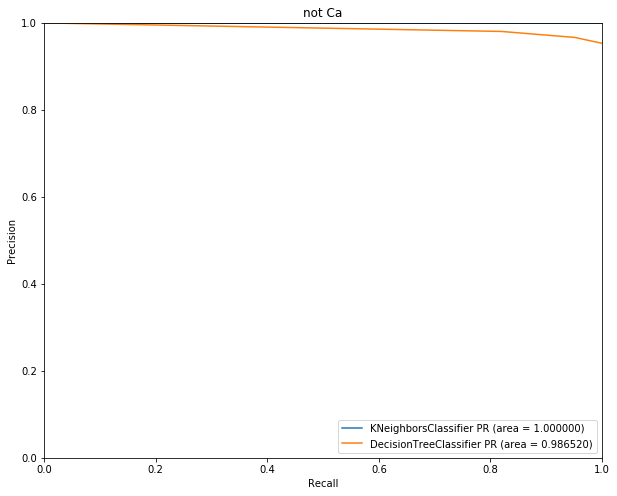

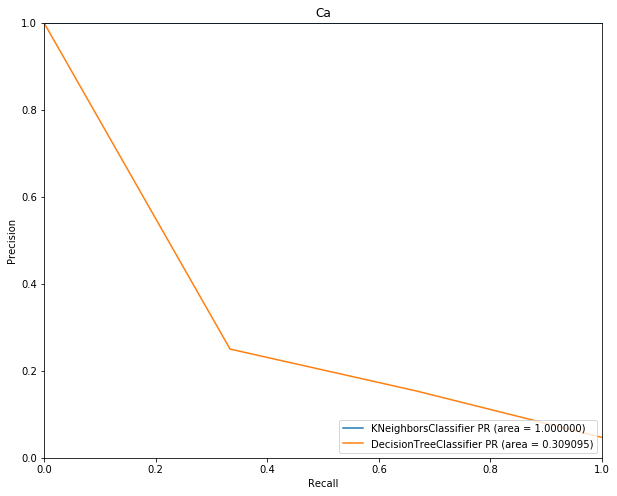

In [58]:
plt.figure(figsize=(10,8))
y_test_invers = []
for i, y in enumerate(y_test.reset_index(drop=True)):
    y_test_invers.append(1-y)
# K соседей
precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_knn1[:,0])
aps_knn1 = average_precision_score(y_test_invers,probas_knn1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('KNeighborsClassifier', aps_knn1)) 
# решающее дерево
precision, recall, thresholds = precision_recall_curve(y_test_invers, probas_dtc1[:,0])
aps_dtc1 = average_precision_score(y_test_invers,probas_dtc1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 
# вывод графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('not Ca')
plt.show()


plt.figure(figsize=(10,8))
# K соседей
precision, recall, thresholds = precision_recall_curve(y_test, probas_knn0[:,1])
aps_knn0 = average_precision_score(y_test,probas_knn0[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('KNeighborsClassifier', aps_knn0)) 
# решающее дерево
precision, recall, thresholds = precision_recall_curve(y_test, probas_dtc1[:,1])
aps_dtc1 = average_precision_score(y_test,probas_dtc1[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 
# вывод графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('Ca')
plt.show()


## Вывод:
#### Классификаторы дерево принятия решений и k ближайших соседей. Классификаторы работают неправильно , тк мало данных и они не сбалансированы.